In [112]:
# Import necessary libraries for data analysis, visualization, and machine learning
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Import machine learning modules
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

jfk_data = pd.read_csv('M1_final.csv')

jfk_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [113]:
jfk_data.info 

<bound method DataFrame.info of        MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0         11             1            5                B6   N828JB  CHS   
1         11             1            5                B6   N992JB  LAX   
2         11             1            5                B6   N959JB  FLL   
3         11             1            5                B6   N999JQ  MCO   
4         11             1            5                DL   N880DN  ATL   
...      ...           ...          ...               ...      ...  ...   
28815      1            31            5                B6   N216JB  ORH   
28816      1            31            5                AA   N104NN  BOS   
28817      1            31            5                AS   N581AS  SEA   
28818      1            31            5                B6   N957JB  SJU   
28819      1            31            5                B6   N958JB  BQN   

       DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew P

In [114]:
# Check the shape of the dataset
print(jfk_data.shape)

# Check for missing values
print(jfk_data.isnull().sum())



(28820, 23)
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64


In [115]:
# Drop rows with missing values - as theres only 2 rows in 'Wind' with missing values this will have a small impact to the overall data analysis, if any
jfk_data = jfk_data.dropna()


In [116]:
jfk_data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [117]:
# To find out how many categories exist under weather condition

jfk_data["Condition"].value_counts()



Condition
Mostly Cloudy            9122
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

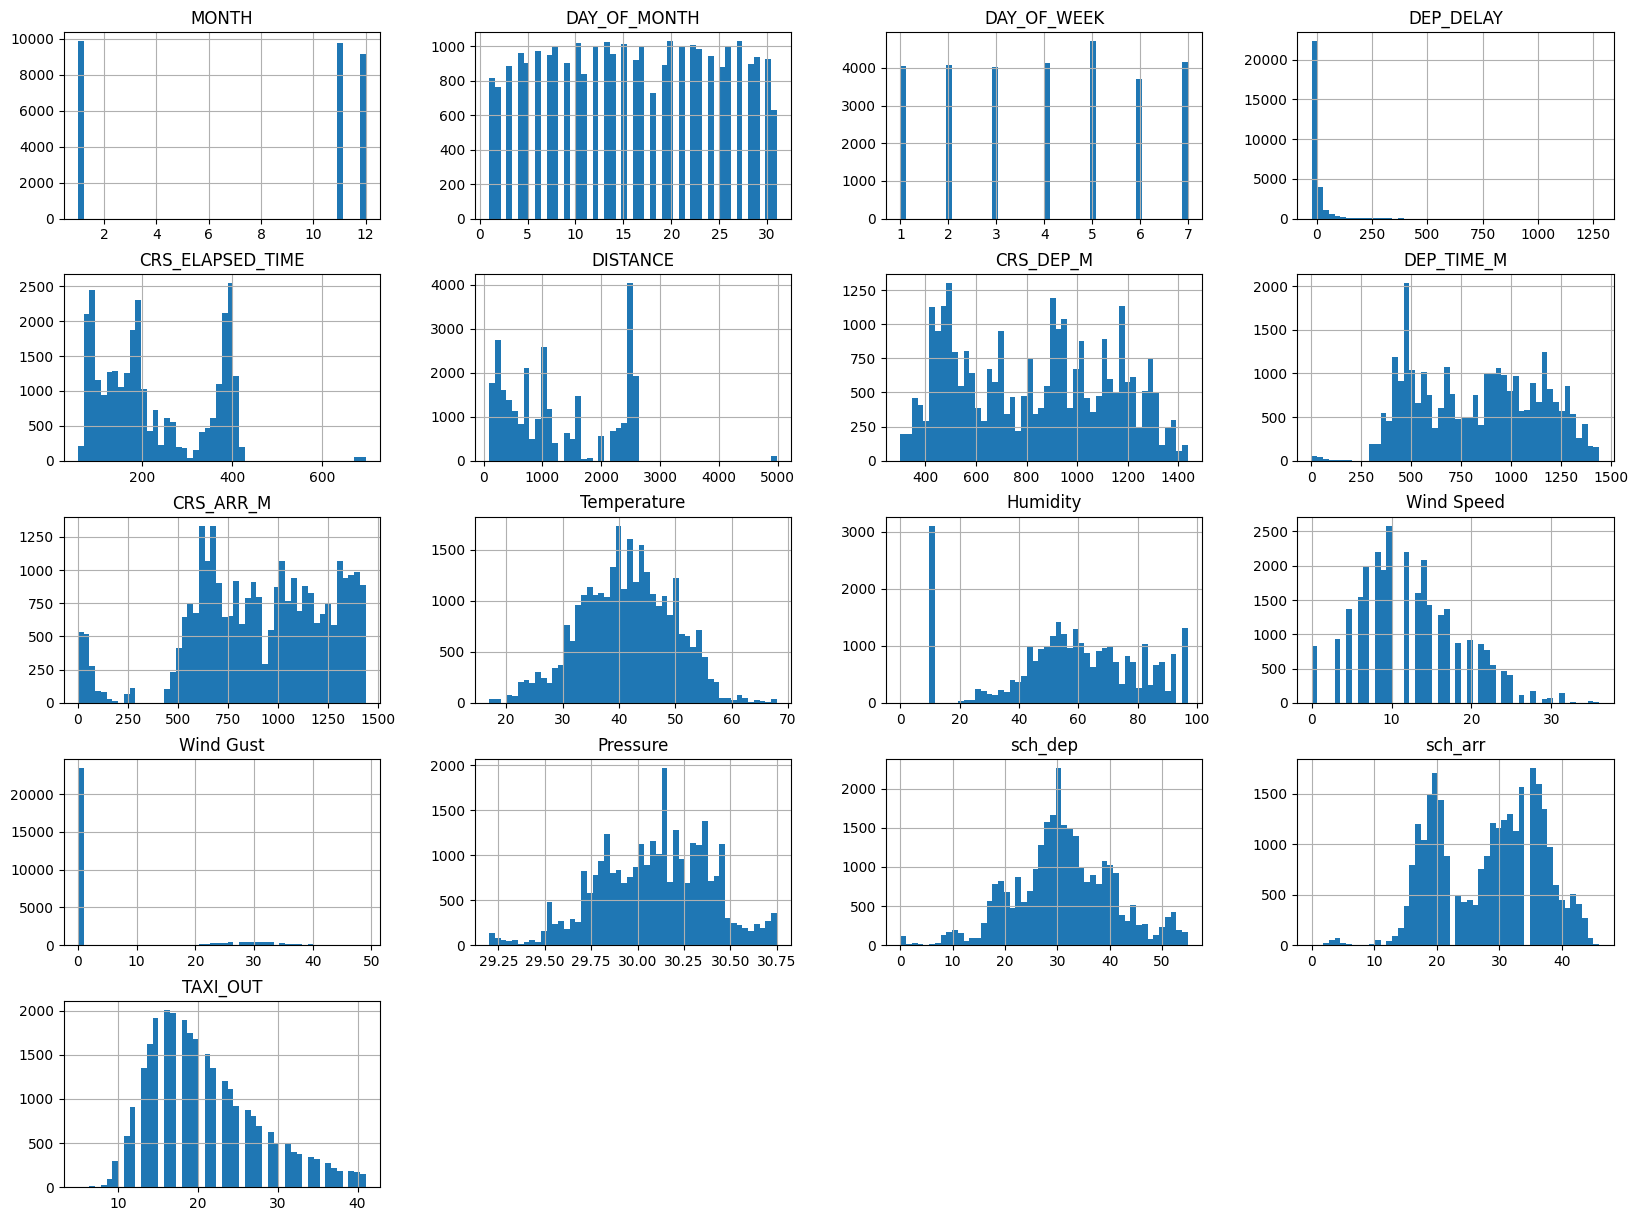

In [118]:
jfk_data.hist(bins=50, figsize=(20, 15))
plt.show

Text(0, 0.5, 'Number of Flights')

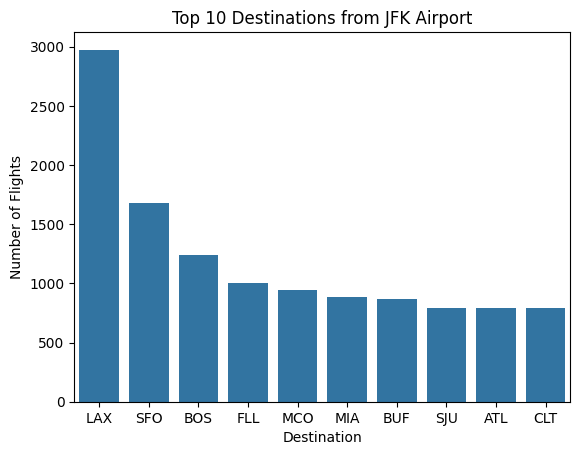

In [119]:
# Get the frequency of each destination
dest_counts = jfk_data["DEST"].value_counts()

# Plot the top 10 destinations
sns.countplot(x='DEST', data=jfk_data, order=dest_counts.iloc[:10].index)
plt.title('Top 10 Destinations from JFK Airport', loc="center")
plt.xlabel('Destination')
plt.ylabel('Number of Flights')

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

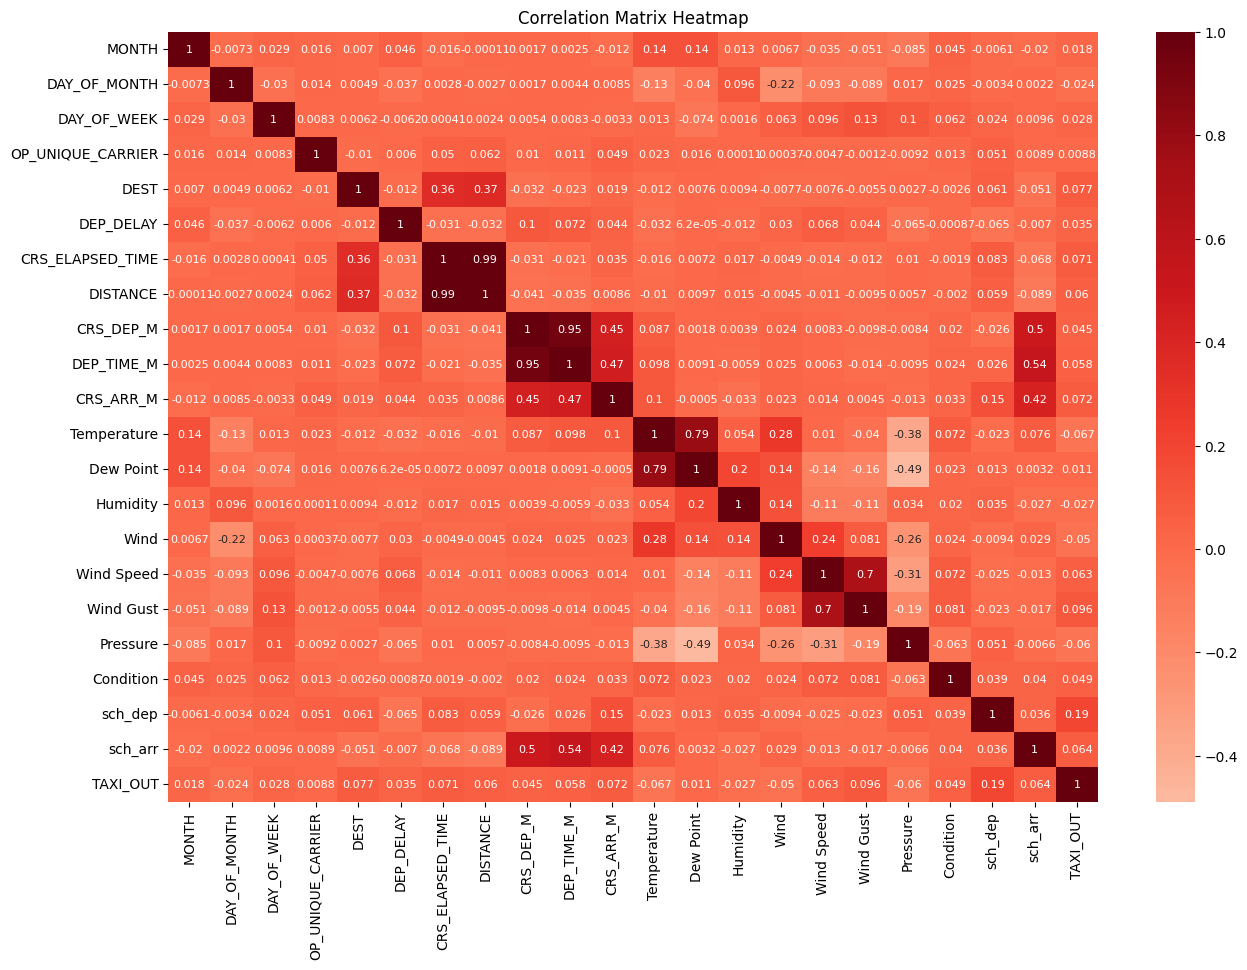

In [120]:
from sklearn.preprocessing import LabelEncoder as LE
jfk_data=jfk_data.drop("TAIL_NUM",axis=1).copy()
jfk_data.sch_dep=LE().fit_transform(jfk_data.sch_dep)
jfk_data.Condition =LE().fit_transform(jfk_data.Condition)
jfk_data.Wind =LE().fit_transform(jfk_data.Wind.astype(str))
jfk_data.DEST=LE().fit_transform(jfk_data.DEST)
jfk_data.OP_UNIQUE_CARRIER=LE().fit_transform(jfk_data.OP_UNIQUE_CARRIER)


corr_matrix = jfk_data.corr()
corr_matrix["Temperature"].sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            annot_kws={'size': 8},
            cmap='Reds',  # Use green color palette
            center=0)  # Centers color scale at 0 for better contrast
plt.title("Correlation Matrix Heatmap", loc="center")

In [121]:
# Select independent variable features for the model
    
# Prepare features (X) and dependent variable (y)
X = jfk_data['Wind Gust'].values.reshape(-1,1)
Y = jfk_data['TAXI_OUT'].values



In [122]:
# Linear Regression 
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [123]:
# Make prediciton on the trained model 
y_pred = lin_reg.predict(X)
y_pred

array([22.64882833, 22.64882833, 22.64882833, ..., 20.55170585,
       20.55170585, 20.55170585], shape=(28818,))

In [124]:
# create a dataframe to see the actual and predicted 

data_pred = pd.DataFrame({'Actual:': Y , 'Predicted': y_pred})
data_pred

,Actual:,Predicted
0,14,22.648828
1,15,22.648828
2,22,22.648828
3,12,22.648828
4,13,22.483266
...,...,...
28813,19,20.551706
28814,22,20.551706
28815,21,20.551706
28816,13,20.551706


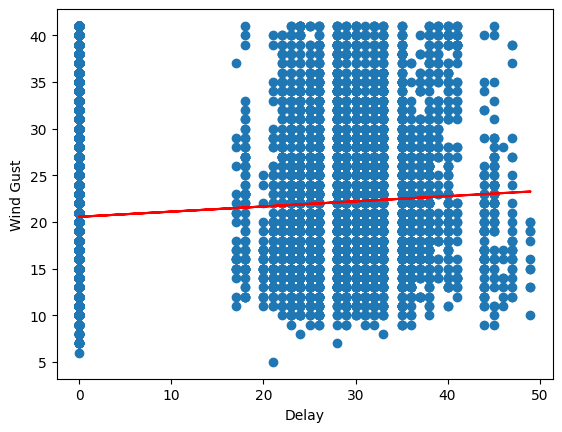

In [125]:
# Plotting data and the prediction 

plt.scatter(X , Y)
plt.plot(X, y_pred, color = 'red')
plt.xlabel ('Delay')
plt.ylabel('Wind Gust')
plt.show()

In [126]:
# Creation of multiple linear regeession 

features = [
        'MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 
        'CRS_ELAPSED_TIME', 'DISTANCE', 
        'Temperature', 'Humidity', 'Wind Speed'
    ]
    
    # Prepare features (X) and target variable (Y)
Z =  jfk_data[features].values



In [127]:
Z

array([[ 11,   5,  -1, ...,  48,  58,  25],
       [ 11,   5,  -7, ...,  48,  58,  25],
       [ 11,   5,  40, ...,  48,  58,  25],
       ...,
       [  1,   5, 283, ...,  39,  96,   6],
       [  1,   5,   5, ...,  39,  96,   6],
       [  1,   5,  -1, ...,  39,  96,   6]], shape=(28818, 8))

In [128]:
# Split our dataset - as half needs to be used to make the model and half to test the model 

Z_train , Z_test , Y_train , Y_test = train_test_split(Z, Y, test_size= 0.2, random_state = 42 )

In [129]:
# Scale the features
scaler = StandardScaler()
Z_train_scaled = scaler.fit_transform(Z_train)
Z_test_scaled = scaler.transform(Z_test)

In [130]:
 # Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(Z_train_scaled, Y_train)

LinearRegression()

In [131]:
# Make Predictions
Y_pred = lin_reg.predict(Z_test_scaled)

In [132]:
# Model eval 
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 5.4300269960367356
R-squared: 0.020224739179375173


A MAE of 5.43 suggests that, on average, your model's predictions deviate by 5.43 units from the true values.

Your R² is 0.020, meaning only 2% of the variance in the target variable is explained by your model.

This is very low, suggesting the model does not fit the data well.

In [34]:
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(Z_train_scaled, Y_train)

print(f'Best Ridge alpha: {ridge_grid.best_params_}')

Best Ridge alpha: {'alpha': 0.1}


In [38]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(Z_train_scaled, Y_train)

# Make predictions
Y_pred_ridge = ridge_reg.predict(Z_test_scaled)

# Evaluate model
ridge_mae = mean_absolute_error(Y_test, Y_pred_ridge)
ridge_r2 = r2_score(Y_test, Y_pred_ridge)
print(f'Ridge Regression - MAE: {ridge_mae}, R-squared: {ridge_r2}')

Ridge Regression - MAE: 5.430121255498072, R-squared: 0.0202494471231639


""" What Do These Results Mean?
MAE is Still High (5.43)

This means that, on average, the predicted departure delays are still 5.43 minutes off from the actual values.
This is nearly identical to the MAE from the standard Linear Regression model, meaning Ridge did not significantly improve prediction accuracy.
R² is Very Low (0.0202 ≈ 2%)

Ridge Regression only explains 2% of the variance in the departure delay (DEP_DELAY).
This suggests that the features you are using are not strong predictors of flight delay.
The model is still not capturing key patterns in the data.


Why Didn’t Ridge Regression Improve the Model?
The Problem is Likely Feature Selection, Not Overfitting

Ridge Regression is useful when multicollinearity (highly correlated features) is a problem.
However, your model’s poor performance likely comes from weak features, not overfitting.
You May Need More Relevant Predictors

Flight delays are influenced by operational factors, such as:
Day of the week & time of day (rush hours might have more delays).
Airport congestion (some airports are more prone to delays).
Weather conditions beyond basic temperature & wind speed (e.g., storms, visibility, snow).
Previous flight delays (aircraft turnaround times can impact departure delays).



In [ ]:
# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(Z_train_scaled, Y_train)

# Make predictions
Y_pred_lasso = lasso_reg.predict(Z_test_scaled)

# Evaluate model
lasso_mae = mean_absolute_error(Y_test, Y_pred_lasso)
lasso_r2 = r2_score(Y_test, Y_pred_lasso)
print(f'Lasso Regression - MAE: {lasso_mae}, R-squared: {lasso_r2}')

Lasso Regression - MAE: 5.4886778812824994, R-squared: -0.0010526083816742027


"""""

Mean Absolute Error (MAE): 5.49 (slightly worse than Ridge Regression and Linear Regression)
R-squared (R²): -0.001 (worse than Ridge and now negative)

What Do These Results Mean?

---MAE Increased Slightly (from 5.43 to 5.49)
This suggests that Lasso removed some features, but the remaining ones did not improve accuracy.
The model is now making slightly worse predictions.

---R² is Negative (-0.001)
A negative R² means the model is performing worse than simply predicting the mean of the target variable.
This suggests that Lasso removed too many important features, making the model underfit.
The model is now too simplistic, missing key information to predict departure delays.